# Chapter 13. Network Data
## Notebook for Python

In [2]:
!pip3 install networkx matplotlib python-louvain

     |████████████████████████████████| 204 kB 4.2 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9401 sha256=e497c60e4824bd856063be098588279f32b8a68e8425c68f1b77e6866fd42420
  Stored in directory: /home/damian/.cache/pip/wheels/c8/68/21/d04741956802581119d875a0d9fce6895e8f9ffae71223f3e3
Successfully built python-louvain


In [3]:
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nxcom
import community # from python-louvain package

### 14.1 Representing and visualizing networks

In [4]:
edges = [("Hillary Clinton", "Donald Trump"), 
         ("Bernie Sanders","Hillary Clinton"), 
         ("Hillary Clinton",  "Barack Obama"), 
         ("John McCain", "Donald Trump"), 
         ("Barack Obama", "Bernie Sanders")]
g1 = nx.Graph()
g1.add_edges_from(edges)
print("Imaginary Facebook network of 5 "
      "American politicians")
print("Nodes:", g1.number_of_nodes(),
      "Edges: ", g1.number_of_edges())
print(g1.edges)

Imaginary Facebook network of 5American politicians
Nodes: 5 Edges:  5
[('Hillary Clinton', 'Donald Trump'), ('Hillary Clinton', 'Bernie Sanders'), ('Hillary Clinton', 'Barack Obama'), ('Donald Trump', 'John McCain'), ('Bernie Sanders', 'Barack Obama')]


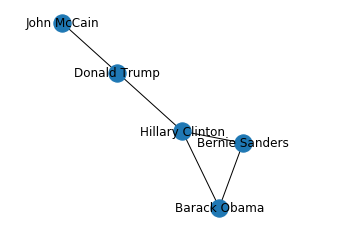

In [4]:
nx.draw_networkx(g1)   

pos=nx.shell_layout(g1)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [5]:
edges += [("Hillary Clinton", "Bernie Sanders"),
          ("Barack Obama","Hillary Clinton")]
g2 = nx.DiGraph()
g2.add_edges_from(edges)
print("Imaginary Twitter network of 5 "
      "American politicians")
print("Nodes:", g2.number_of_nodes(),
      "Edges: ", g2.number_of_edges())
print(g2.edges)

Imaginary Twitter network of 5 American politicians
Nodes: 5 Edges:  7
[('Hillary Clinton', 'Donald Trump'), ('Hillary Clinton', 'Barack Obama'), ('Hillary Clinton', 'Bernie Sanders'), ('Bernie Sanders', 'Hillary Clinton'), ('Barack Obama', 'Bernie Sanders'), ('Barack Obama', 'Hillary Clinton'), ('John McCain', 'Donald Trump')]


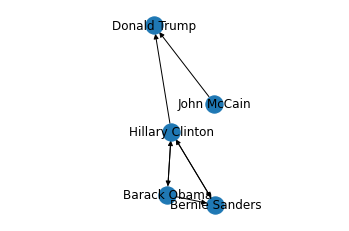

In [6]:
nx.draw_networkx(g2)

pos=nx.shell_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

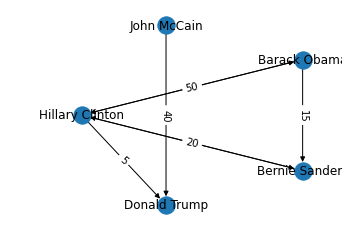

In [7]:
edges_w = [("Hillary Clinton", "Donald Trump", 5),
    ("Bernie Sanders","Hillary Clinton", 20),
    ("Hillary Clinton", "Barack Obama", 30), 
    ("John McCain", "Donald Trump", 40),
    ("Barack Obama", "Hillary Clinton", 50),
    ("Hillary Clinton", "Bernie Sanders", 10),
    ("Barack Obama", "Bernie Sanders", 15)]
g2 = nx.DiGraph()
g2.add_weighted_edges_from(edges_w)

edge_labels=dict([((u,v,),d['weight']) for 
                  u,v,d in g2.edges(data=True)])

nx.draw_networkx_edge_labels(g2,pos,
                    edge_labels=edge_labels)
nx.draw_networkx(g2, pos)

pos=nx.spring_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

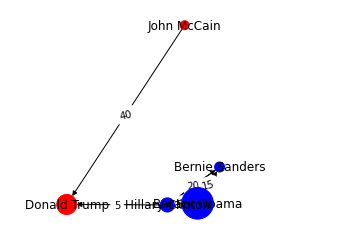

In [8]:
attrs = {'Hillary Clinton': {'followers': 100000,
                             'party': 'Democrat'}, 
         'Donald Trump': {'followers': 200000, 
                          'party': 'Republican'}, 
         'Bernie Sanders': {'followers': 50000,
                            'party': 'Democrat'}, 
         'Barack Obama': {'followers': 500000,
                          'party': 'Democrat'}, 
         'John McCain': {'followers': 40000,
                         'party': 'Republican'} }
nx.set_node_attributes(g2, attrs)
size = nx.get_node_attributes(g2, 'followers')
size = list(size.values())

colors= nx.get_node_attributes(g2, 'party')
colors = list(colors.values())
colors = [w.replace('Democrat', 'blue') for
          w in colors]
colors = [w.replace('Republican', 'red') for
          w in colors]

nx.draw_networkx_edge_labels(g2,pos,
                    edge_labels=edge_labels)
nx.draw_networkx(g2, pos, node_size=
                 [x * 0.002 for x in size], 
                 node_color=colors)

pos=nx.spring_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [9]:
g3 = g1.subgraph(['Hillary Clinton', 
                  'Bernie Sanders', 
                  'Barack Obama'])
print("Democrats:")
print("Nodes:", g3.number_of_nodes(),
      "Edges: ", g3.number_of_edges())
print(g3.edges)

g4 = g1.subgraph(['Donald Trump', 'John McCain'])
print("Republicans:")
print("Nodes:", g4.number_of_nodes(),
      "Edges: ", g4.number_of_edges())
print(g4.edges)

Democrats:
Nodes: 3 Edges:  3
[('Hillary Clinton', 'Bernie Sanders'), ('Hillary Clinton', 'Barack Obama'), ('Bernie Sanders', 'Barack Obama')]
Republicans:
Nodes: 2 Edges:  1
[('Donald Trump', 'John McCain')]


In [10]:
url="https://cssbook.net/d/politicians_twitter.csv"
fn, _headers = urllib.request.urlretrieve(url)
g2 = nx.read_adjlist(fn, create_using=nx.DiGraph,
                     delimiter=",")
print("Nodes:", g2.number_of_nodes(),
      "Edges: ", g2.number_of_edges())

Nodes: 5 Edges:  7


### 14.2 Social network analysis

In [11]:
for path in nx.all_simple_paths(g1, 
                source="Barack Obama",
                target="John McCain"):
    print(path)

['Barack Obama', 'Hillary Clinton', 'Donald Trump', 'John McCain']
['Barack Obama', 'Bernie Sanders', 'Hillary Clinton', 'Donald Trump', 'John McCain']


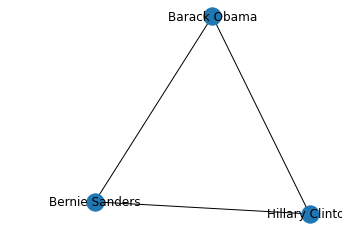

In [12]:
nx.draw_networkx(g3)
pos=nx.shell_layout(g3)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

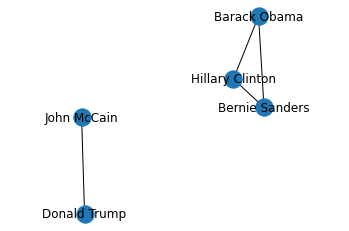

In [13]:
#Remove the friendship between Clinton and Trump
g6 = g1.copy()
g6.remove_edge("Hillary Clinton","Donald Trump")
nx.draw_networkx(g6)
pos=nx.shell_layout(g6)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [14]:
print("Average path length in Facebook network: ",
      nx.average_shortest_path_length(g1))
paths = list(nx.shortest_simple_paths(g1,
                "Barack Obama", "John McCain"))
print("Distance between Obama and McCain",
      len(paths[0])-1)

Average path length in Facebook network:  1.7
Distance between Obama and McCain 3


In [15]:
print("Incident edges of John McCain:",
      g1.edges("John McCain"))
print("Neighbors of John McCain", 
      [n for n in g1.neighbors("John McCain")])

Incident edges of John McCain: [('John McCain', 'Donald Trump')]
Neighbors of John McCain ['Donald Trump']


In [17]:
print("Density in Facebook network: ", 
      nx.density(g1))
print("Density in Twitter network: ",
      nx.density(g2))
print("Transitivity in Facebook network: ",
      nx.transitivity(g1))
print("Diameter in Facebook network: ",
      nx.diameter(g1, e=None, usebounds=False))
print("Reciprocity in Twitter network: ", 
      nx.reciprocity(g2))

Density in Facebook network:  0.5
Density in Twitter network:  0.35
Transitivity in Facebook network:  0.5
Diameter in Facebook network:  3
Reciprocity in Twitter network:  0.5714285714285714


In [19]:
print("Degree centrality of Facebook" 
      "network (undirected): \n",
      nx.degree_centrality(g1))
print("Degree centrality of Twitter"
      "network (directed): \n",
      nx.degree_centrality(g2))
print("In degree centrality of Twitter"
      "network (directed): \n",
      nx.in_degree_centrality(g2))
print("Out degree centrality of Twitter"
      "network (directed): \n",
      nx.out_degree_centrality(g2))

Degree centrality of Facebooknetwork (undirected): 
 {'Hillary Clinton': 0.75, 'Donald Trump': 0.5, 'Bernie Sanders': 0.5, 'Barack Obama': 0.5, 'John McCain': 0.25}
Degree centrality of Twitternetwork (directed): 
 {'Hillary Clinton': 1.25, 'Donald Trump': 0.5, 'Bernie Sanders': 0.75, 'Barack Obama': 0.75, 'John McCain': 0.25}
In degree centrality of Twitternetwork (directed): 
 {'Hillary Clinton': 0.5, 'Donald Trump': 0.5, 'Bernie Sanders': 0.5, 'Barack Obama': 0.25, 'John McCain': 0.0}
Out degree centrality of Twitternetwork (directed): 
 {'Hillary Clinton': 0.75, 'Donald Trump': 0.0, 'Bernie Sanders': 0.25, 'Barack Obama': 0.5, 'John McCain': 0.25}


In [20]:
print("Closeness centrality of Facebook"
      "network (undirected): \n",
      nx.closeness_centrality(g1))
print("Eigenvector centrality of Facebook"
      "network (undirected): \n",
      nx.eigenvector_centrality(g1))
print("Betweenness centrality of Facebook"
      "network (undirected): \n",
      nx.betweenness_centrality(g1))

Closeness centrality of Facebooknetwork (undirected): 
 {'Hillary Clinton': 0.8, 'Donald Trump': 0.6666666666666666, 'Bernie Sanders': 0.5714285714285714, 'Barack Obama': 0.5714285714285714, 'John McCain': 0.4444444444444444}
Eigenvector centrality of Facebooknetwork (undirected): 
 {'Hillary Clinton': 0.6037035301706529, 'Donald Trump': 0.34248744909850964, 'Bernie Sanders': 0.49715259845254134, 'Barack Obama': 0.49715259845254134, 'John McCain': 0.15467056143060928}
Betweenness centrality of Facebooknetwork (undirected): 
 {'Hillary Clinton': 0.6666666666666666, 'Donald Trump': 0.5, 'Bernie Sanders': 0.0, 'Barack Obama': 0.0, 'John McCain': 0.0}


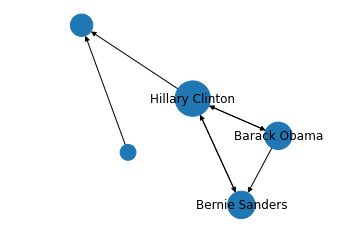

In [21]:
size = list(nx.degree_centrality(g2).values())
size = [x * 1000 for x in size]
labels_filtered = {k: v for k, v in 
    nx.degree_centrality(g2).items() if v > 0.5 }
labels = {} 
for k, v in labels_filtered.items(): 
    labels[k] = k

nx.draw_networkx(g2, node_size= size, 
                 labels=labels)

pos=nx.shell_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [22]:
print("Number of cliques: ",
      nx.graph_number_of_cliques(g1))
print("Cliques: ", list(nx.find_cliques(g1)))

Number of cliques:  3
Cliques:  [['John McCain', 'Donald Trump'], ['Hillary Clinton', 'Donald Trump'], ['Hillary Clinton', 'Barack Obama', 'Bernie Sanders']]


In [23]:
cluster1 = nxcom.girvan_newman(g1)

In [24]:
c1 = next(cluster1)
print(f"Girvan-Neuman:\nLength {len(c1)}")
print(f"Modularity: "
      f"{nxcom.modularity(g1, c1):.2f}")
print(f"Membership: {c1}")

Girvan-Neuman:
Length 2
Modularity: 0.22
Membership: ({'Barack Obama', 'Hillary Clinton', 'Bernie Sanders'}, {'Donald Trump', 'John McCain'})


In [25]:
print("Louvain")
cluster2 = community.best_partition(g1)
print("Length: "
      f"{float(len(set(cluster2.values())))}")
print("Modularity: "
      f"{community.modularity(cluster2, g1):.2f}")
print(f"Membership: {cluster2}")

print("\nGreedy optimization")
cluster3 = nxcom.greedy_modularity_communities(g1)
c3 = sorted(cluster3, key=len, reverse=True)
print(f"Length {len(c3)}")
print("Modularity:"
      f"{nxcom.modularity(g1, c3):.2f}")
print(f"Membership: {c3}")

print("\nPropagating label: ")
cluster4 = nxcom.asyn_lpa_communities(g1)
c4 = sorted(cluster4, key=len, reverse=True)
print("Length: ", len(c4))
print("Modularity:"
      f"{nxcom.modularity(g1, c4):.2f}")
print("Membership: ", c4)

Louvain
Length: 2.0
Modularity: 0.22
Membership: {'Hillary Clinton': 0, 'Donald Trump': 1, 'Bernie Sanders': 0, 'Barack Obama': 0, 'John McCain': 1}

Greedy optimization
Length 2
Modularity:0.22
Membership: [frozenset({'Barack Obama', 'Hillary Clinton', 'Bernie Sanders'}), frozenset({'Donald Trump', 'John McCain'})]

Propagating label: 
Length:  1
Modularity:0.00
Membership:  [{'John McCain', 'Barack Obama', 'Donald Trump', 'Bernie Sanders', 'Hillary Clinton'}]


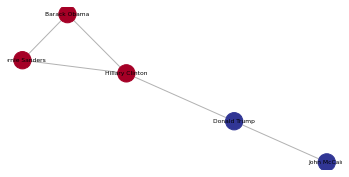

In [26]:
#Plot with Louvain algortihm
pos = nx.spring_layout(g1)
plt.figure(figsize=(6,3))
plt.axis('off')
nx.draw_networkx_labels(g1,pos,font_size=6)
nx.draw_networkx_nodes(g1, pos,
        cmap=plt.cm.RdYlBu,
        node_color=list(cluster2.values()))
nx.draw_networkx_edges(g1, pos, alpha=0.3)
plt.show(g1)

In [28]:
url = 'http://cssbook.net/d/friends3.csv'
fn, _headers = urllib.request.urlretrieve(url)
g_friends = nx.read_adjlist(fn,
            create_using=nx.Graph, delimiter=";")
print("Nodes:", g_friends.number_of_nodes(),
      "Edges: ", g_friends.number_of_edges())
print("Nodes:", g_friends.number_of_nodes(),
      "Edges: ", g_friends.number_of_edges())
print("Degree centrality: ")
print(sorted(nx.degree_centrality(
    g_friends).items(), key=lambda x: x[1], 
             reverse=True)[0:9])
print("Betweenness centrality: ")
print(sorted(nx.betweenness_centrality(
    g_friends).items(), key=lambda x: x[1],
             reverse=True)[0:9])
print("Closeness centrality: ")
print(sorted(nx.closeness_centrality(
    g_friends).items(), key=lambda x: x[1],
             reverse=True)[0:9])
print("Clustering with Louvain: ")
cluster5 = community.best_partition(g_friends)
size = float(len(set(cluster5.values())))
print("Length: ", size)
print("Modularity: "
      f"{community.modularity(cluster5, g_friends):.2f}")

Nodes: 491 Edges:  500
Nodes: 491 Edges:  500
Degree centrality: 
[('Pablo_Iglesias_', 0.20612244897959187), ('Albert_Rivera', 0.20408163265306123), ('agarzon', 0.20408163265306123), ('sanchezcastejon', 0.20408163265306123), ('marianorajoy', 0.20408163265306123), ('CEARefugio', 0.004081632653061225), ('VictorLapuente', 0.004081632653061225), ('javierfernandez', 0.004081632653061225), ('mas_demo', 0.004081632653061225)]
Betweenness centrality: 
[('sanchezcastejon', 0.4847681328312369), ('agarzon', 0.44044055921356695), ('Albert_Rivera', 0.4226327682769384), ('marianorajoy', 0.384657568548892), ('Pablo_Iglesias_', 0.35788117228958527), ('elenballesteros', 0.19595159798490358), ('Unidadpopular__', 0.13749254219017618), ('kanciller', 0.08787927105192601), ('JuanfranGuevara', 0.08787927105192601)]
Closeness centrality: 
[('sanchezcastejon', 0.3592375366568915), ('agarzon', 0.33653846153846156), ('Pablo_Iglesias_', 0.3356164383561644), ('Unidadpopular__', 0.3353867214236824), ('CEARefugio', 

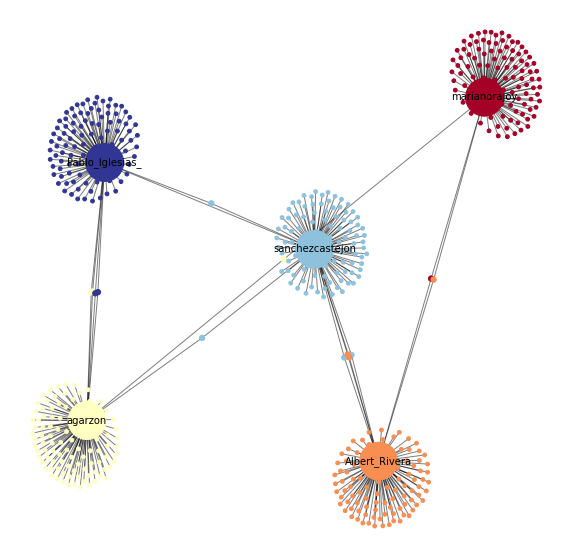

In [29]:
pos = nx.spring_layout(g_friends)
plt.figure(figsize=(10,10))
plt.axis('off')

size = list(nx.degree_centrality(
    g_friends).values())
size = [x * 7000 for x in size]
labels_filtered = {k: v for k, v in
    nx.degree_centrality(g_friends).items() if 
                   v > 0.005 }
labels = {} 
for k, v in labels_filtered.items(): 
    labels[k] = k

nx.draw_networkx_labels(g_friends,
                        pos,
                        font_size=10,
                        labels=labels)
nx.draw_networkx_nodes(g_friends,
                       pos,
                       node_size= size,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(cluster5.values()))
nx.draw_networkx_edges(g_friends, pos, alpha=0.5)
plt.show(g_friends)